<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/Regress%C3%A3o_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Polinomial

A Regressão Polinomial é uma forma de análise de regressão na qual a relação entre as variáveis independentes e dependentes é modelada por um polinômio de grau n.

Os modelos de Regressão Polinomial geralmente são ajustados pelo método dos mínimos quadrados. Esse método minimiza a variância dos coeficientes, conforme o Teorema de Gauss-Markov.

A Regressão Polinomial é um caso especial da Regressão Linear, no qual ajustamos uma equação polinomial aos dados, representando uma relação curvilínea entre as variáveis dependentes e independentes.

Na estatística, a Regressão Polinomial é uma forma de análise de regressão em que a relação entre a variável independente $x$ e a variável dependente $y$ é modelada como um polinômio de grau n em $x$. A regressão polinomial ajusta uma relação não linear entre o valor de $x$ e a média condicional correspondente de $y$, denotada por $E(y | x)$.

Embora a Regressão Polinomial ajuste um modelo não linear aos dados, do ponto de vista da estimativa estatística, ela é considerada linear, no sentido de que a função de regressão $E(y | x)$ é linear em relação aos parâmetros desconhecidos que são estimados a partir dos dados. Por esse motivo, a Regressão Polinomial é considerada um caso especial da Regressão Linear Múltipla.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 510.0, 586.0])
X = X.reshape(-1, 1)
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 379.0, 390.8])

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

lr.fit(X, y)
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)

y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.10000e+02, 2.60100e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

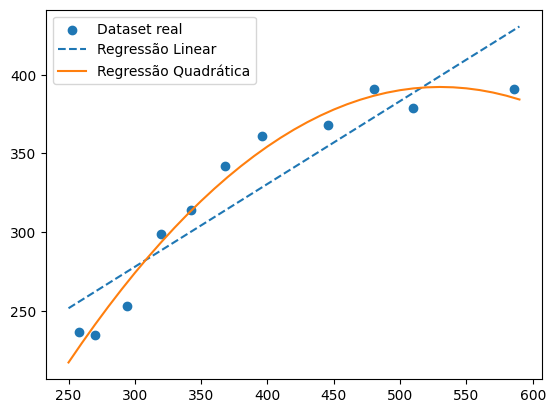

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Dataset real')
plt.plot(X_fit, y_lin_fit, label='Regressão Linear', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Regressão Quadrática')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('MSE linear: %.3f, Quadrático: %.3f' % (
    mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

MSE linear: 528.746, Quadrático: 73.697


In [ ]:
from sklearn.metrics import r2_score
print('R^2 linear: %.3f, Quadrático: %.3f' % (
    r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

R^2 linear: 0.843, Quadrático: 0.978


# Coeficiente de determinação
O coeficiente de determinação, também chamado de **R²** ou **R2**, é uma medida de ajuste de um modelo estatístico linear generalizado, como a *regressão linear* simples ou múltipla, aos valores observados de uma variável aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

## Método $R^2$

$$SQ_{\text{tot}}=\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}$$

onde $\displaystyle n$ é o numero de observações. Partindo de que $y_{i}$ é o valor observado e $\bar {y}$ é a média das observações, esta equação dá-nos a *Soma Total dos Quadrados*, ou seja, a soma dos quadrados das diferenças entre a média e cada valor observado.

$$SQ_{\text{res}}=\sum _{i=1}^{n}(y_{i}-{\hat {y}_i})^{2}$$

onde $\hat {y_{i}}$ é o valor estimado (previsão) de $y_{i}$. Esta equação é a soma dos quadrados dos resíduos, que calcula a parte que não é explicada pelo modelo.

$$SQ_{\text{exp}}=\sum _{i=1}^{n}({\hat {y_{i}}}-{\bar {y}})^{2}$$

onde $\hat {y_{i}}$ é o valor estimado (previsão) de $y_{i}$. Esta equação, a soma dos quadrados explicada, indica-nos a diferença entre a média das observações e o valor estimado para cada observação, e soma os respectivos quadrados. Quanto menor for a diferença, maior poder explicativo detém o modelo.

Em alguns casos temos:
$$SQ_{\text{tot}} = SQ_{\text{res}}+ SQ_{\text{exp}}$$

E normalizando a equação de cima, temos que:
$$R^{2}={\frac {SQ_{\text{exp}}}{SQ_{\text{tot}}}}=1-{\frac {SQ_{\text{res}}}{SQ_{\text{tot}}}}$$

# Exercícios

1. Utilize polinômios de grau 3 e 4 nos cálculos da regressão polinomial. Compare os resultados com a regressão quadrática.

2. Aumente o banco de dados (*data augmentation*) dobrando a quantidade de amostras. Para isso, utilize a média entre duas amostras originais para criar uma nova amostra fictícia. Compare os resultados.


## Referências

[1] https://www.javatpoint.com/machine-learning-polynomial-regression

[2] https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb

[3] https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18